# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [I Gusti Putu Oka Sugiarta]
- **Email:** [okasugi09@gmail.com]
- **ID Dicoding:** [oka_sugiarta]

## Menentukan Pertanyaan Bisnis

- Pada bulan apa bike share riding mendapatkan orderan paling sedikit dalam 1 tahun?
- Pada musim apa bike share riding mendapatkan orderan paling sedikit dalam 1 tahun?
- Bagaimana korelasi cuaca terhadap total order bike share riding?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/okasugiarta/proyek_akhir_analisis_data_dicoding/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

### Menilai tabel day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Cleaning Data

### Membersihkan tabel day_df

### Menghilangkan duplicate data

In [5]:
day_df.drop_duplicates(inplace=True)

In [6]:
print("Jumlah Dupliaksi: ", day_df.duplicated().sum())

Jumlah Dupliaksi:  0


## Exploratory Data Analysis (EDA)

### Explore day_df

In [8]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
201,202,2011-07-21,3,0,7,0,4,1,2,0.815000,0.826371,0.691250,0.222021,632,3152,3784
79,80,2011-03-21,2,0,3,0,1,1,2,0.430435,0.409735,0.737391,0.288783,401,1676,2077
570,571,2012-07-24,3,1,7,0,2,1,1,0.750833,0.706450,0.655000,0.211454,1140,6452,7592
608,609,2012-08-31,3,1,8,0,5,1,1,0.764167,0.689400,0.587500,0.168533,1433,5917,7350
158,159,2011-06-08,2,0,6,0,3,1,1,0.775833,0.727279,0.622083,0.136817,676,3725,4401


In [9]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [10]:
day_df.shape

(731, 16)

There are 16 columns and 731 rows in the day_df dataframe.

* Mengubah tipe data pada beberapa kolom

In [11]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df['season'] = day_df.season.astype('category')
day_df['mnth'] = day_df.mnth.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weathersit'] = day_df.weathersit.astype('category')

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(6), datetime64

In [13]:
# Selanjutnya yaitu engonversi data pada kolom kategori variabel 

# Konversi nilai untuk kolom 'season' : 1:Winter, 2:Spring, 3:Summer, 4:Fall
day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)

# Konversi nilai untuk kolom 'yr' : 0:2011, 1:2012
day_df.yr.replace((0,1), (2011,2012), inplace=True)

# Konversi nilai untuk kolom 'mnth' :  1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# Konversi nilai untuk kolom 'weathersit' : 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_RainSnow','Heavy_RainSnow'), inplace=True)

# Konversi nilai untuk kolom 'weekday' : 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)

# Konversi nilai untuk kolom 'workingday' : 0:No, 1:Yes
day_df.workingday.replace((0,1), ('No', 'Yes'), inplace=True)

C:\Users\OKA\AppData\Local\Temp\ipykernel_3436\3973994515.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4), ('Winter','Spring','Summer','Fall'), inplace=True)
C:\Users\OKA\AppData\Local\Temp\ipykernel_3436\3973994515.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df.season

In [14]:
# Drop kolom yang tidak digunakan dalam data
day_df = day_df.drop("instant", axis=1)
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
# Merubah nama kolom

day_df.rename(columns={
    "dteday" : "date",
    "yr" : "year",
    "mnth" : "month",
    "weathersit" : "weather",
    "hum" : "humidity",
    "cnt" : "total_count"}, inplace=True
)

In [16]:
# Merubah nilai dari 'temp', 'atemp', 'humidity, 'windspeed' ke dalam nilai yang belum dinormalisasi

day_df['temp'] = day_df['temp']*41
day_df['atemp'] = day_df['atemp']*50
day_df['humidity'] = day_df['humidity']*100
day_df['windspeed'] = day_df['windspeed']*67

In [17]:
day_df.head(15)

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_count
0,2011-01-01,Winter,2011,Jan,0,Saturday,No,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Winter,2011,Jan,0,Sunday,No,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Winter,2011,Jan,0,Monday,Yes,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Winter,2011,Jan,0,Tuesday,Yes,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Winter,2011,Jan,0,Wednesday,Yes,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,2011-01-06,Winter,2011,Jan,0,Thursday,Yes,Clear,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,2011-01-07,Winter,2011,Jan,0,Friday,Yes,Misty,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,2011-01-08,Winter,2011,Jan,0,Saturday,No,Misty,6.765000,8.11270,53.5833,17.875868,68,891,959
8,2011-01-09,Winter,2011,Jan,0,Sunday,No,Clear,5.671653,5.80875,43.4167,24.250650,54,768,822
9,2011-01-10,Winter,2011,Jan,0,Monday,Yes,Clear,6.184153,7.54440,48.2917,14.958889,41,1280,1321


### day_df dalam Histogram

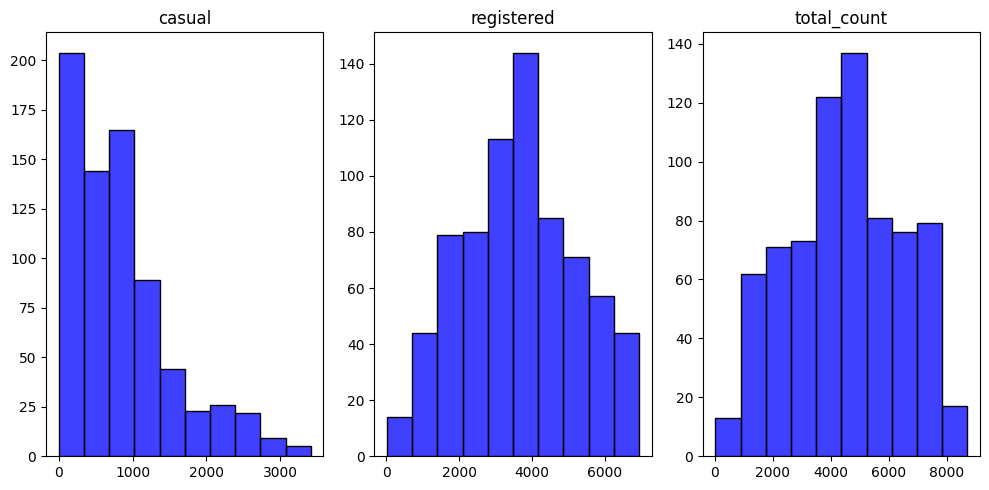

In [18]:
columns = ['casual', 'registered', 'total_count']

fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.histplot(x=day_df[columns[i]], ax=ax, bins=10, color='blue')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

### day_df dalam Boxplot

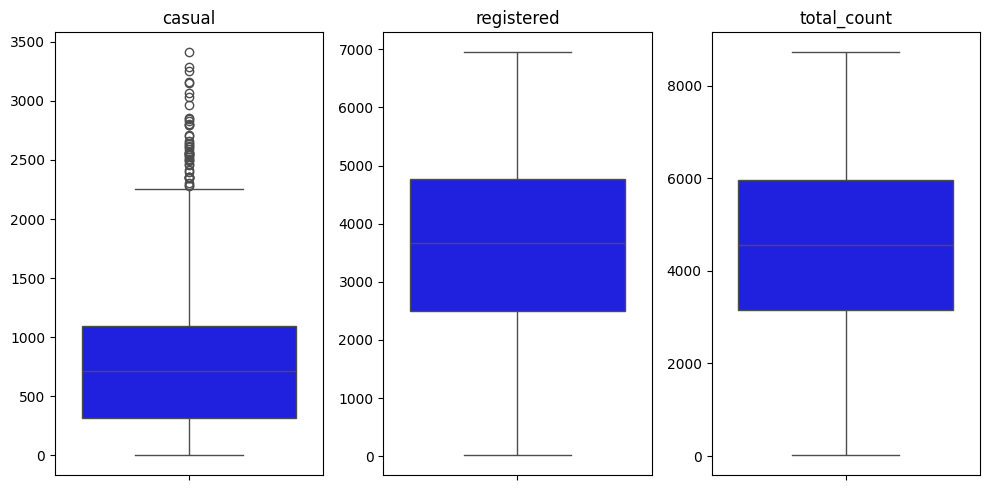

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(10,5))

for i, ax in enumerate(ax):
    sns.boxplot(y=day_df[columns[i]], ax=ax, color='blue')
    ax.set_title(columns[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()
plt.show()

Dari pemaparan tersebut terdapat beberapa hal :
* Histogram untuk casual menujukkan right skewed distribution
* Histogram untuk registered dan total_count menunjukkan distribusi normal.
* Histogram untuk registered dan total_count menunjukkan distribusi normal.

Boxplot Bike share riding tiap bulan

C:\Users\OKA\AppData\Local\Temp\ipykernel_3436\1909952838.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\OKA\AppData\Local\Temp\ipykernel_3436\1909952838.py:4: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


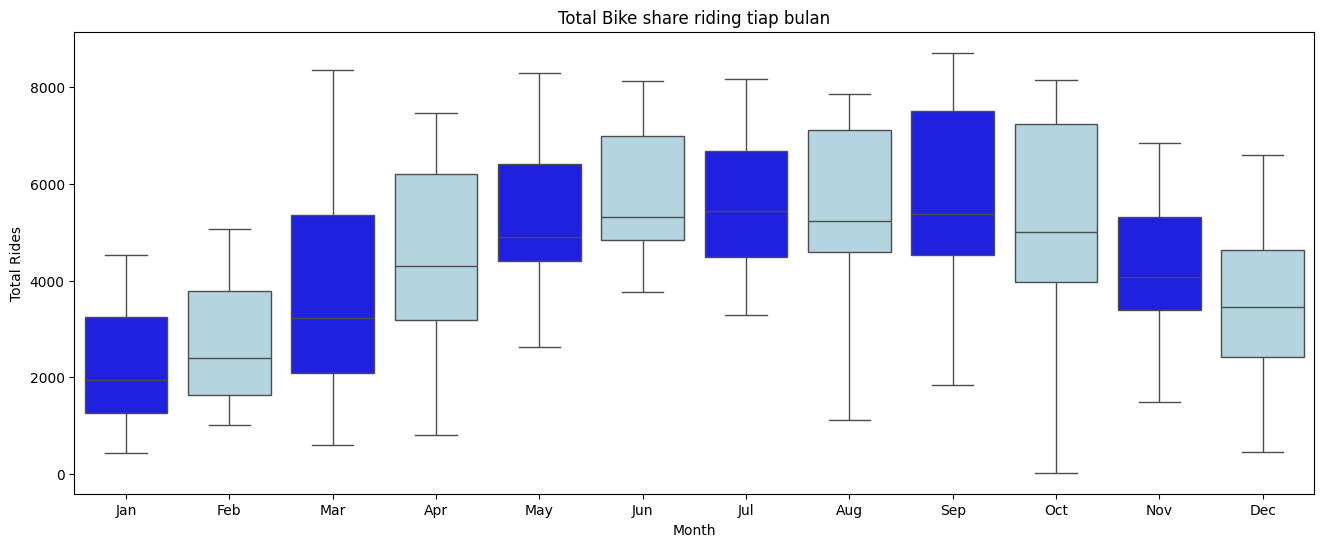

In [20]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="month",
    y="total_count",
    data=day_df,
    palette=["blue", "lightblue"]
)

# Add labels and a title to the plot
plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total Bike share riding tiap bulan")

# Show the plot
plt.show()

Bike share riding memiliki permintaan terendah pada bulan Januaria

Boxplot Bike share riding tiap Musim

C:\Users\OKA\AppData\Local\Temp\ipykernel_3436\2221617435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\OKA\AppData\Local\Temp\ipykernel_3436\2221617435.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


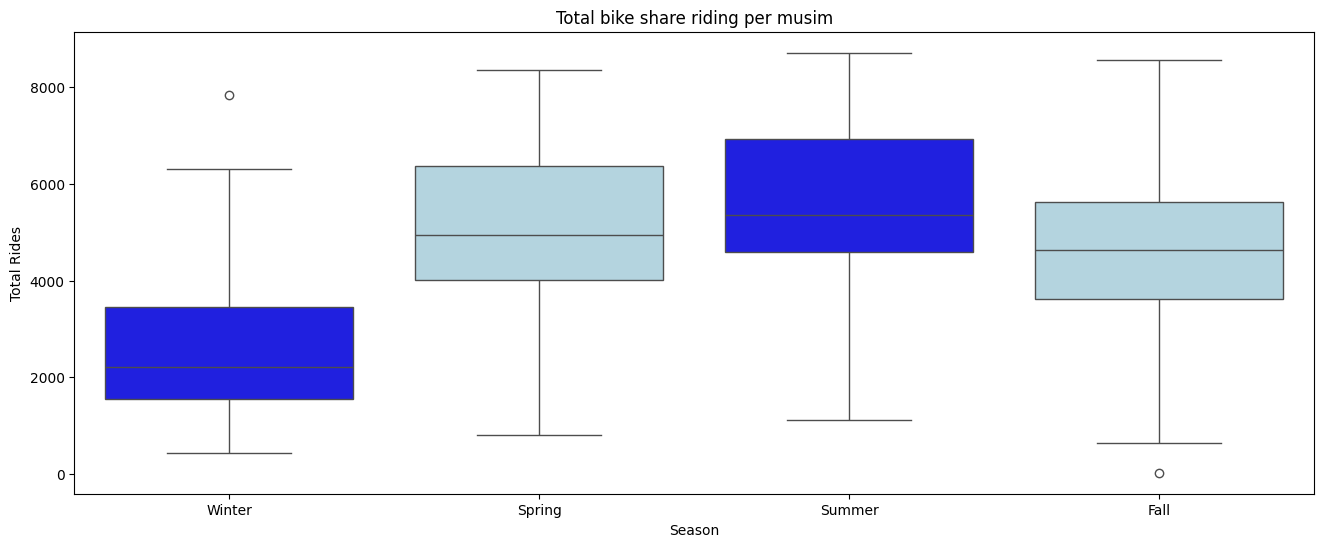

In [21]:
plt.figure(figsize=(16,6))

# Create a boxplot using the sns.boxplot() function
sns.boxplot(
    x="season",
    y="total_count",
    data=day_df,
    palette=["blue", "lightblue"]
)

# Add labels and a title to the plot
plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bike share riding per musim")

# Show the plot
plt.show()

Bike sharing riding memiliki permintaan terendah pada musim Winter

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa bike share riding mendapatkan orderan paling sedikit dalam 1 tahun?

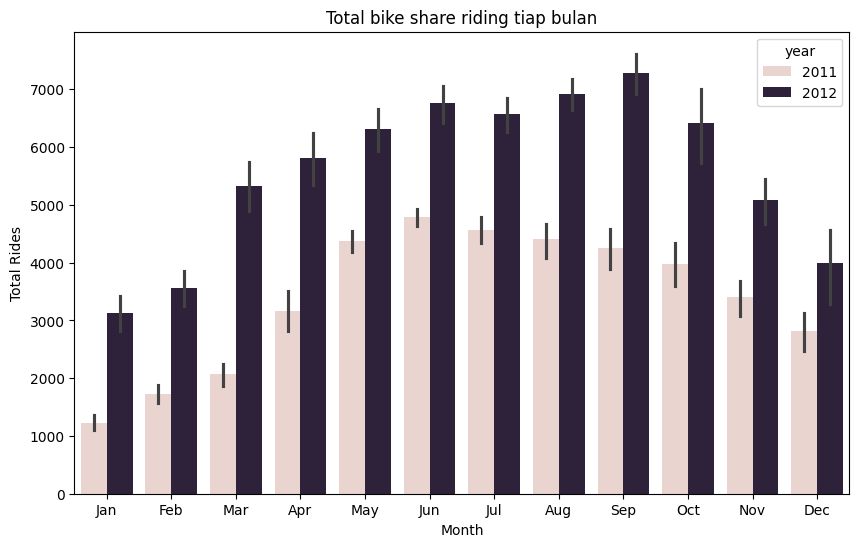

In [22]:
plt.figure(figsize=(10,6))

sns.barplot(x='month', y='total_count', data=day_df, hue='year')

plt.xlabel("Month")
plt.ylabel("Total Rides")
plt.title("Total bike share riding tiap bulan")

plt.show()

* pada tahun 2011 terjadi permintaan terendah terkait bike share riding yaitu pada bulan Januari
* Pada tahun 2012 terjadi permintaan terendah terkait bike share riding yaitu pada bulan Januari

### Pertanyaan 2: Pada musim apa bike share riding mendapatkan orderan paling sedikit dalam 1 tahun?

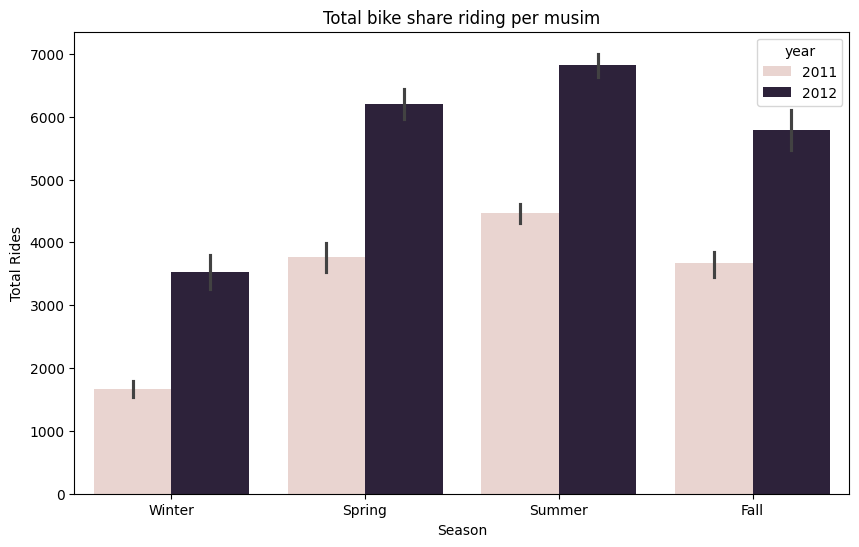

In [23]:
plt.figure(figsize=(10,6))

sns.barplot(x='season', y='total_count', data=day_df, hue='year')

plt.xlabel("Season")
plt.ylabel("Total Rides")
plt.title("Total bike share riding per musim")

plt.show()

* pada tahun 2011 terjadi permintaan terendah terkait bike share riding yaitu pada musim Winter
* Pada tahun 2012 terjadi permintaan terendah terkait bike share riding yaitu pada musim Winter

### Pertanyaan 3: Bagaimana korelasi cuaca terhadap total order bike share riding?

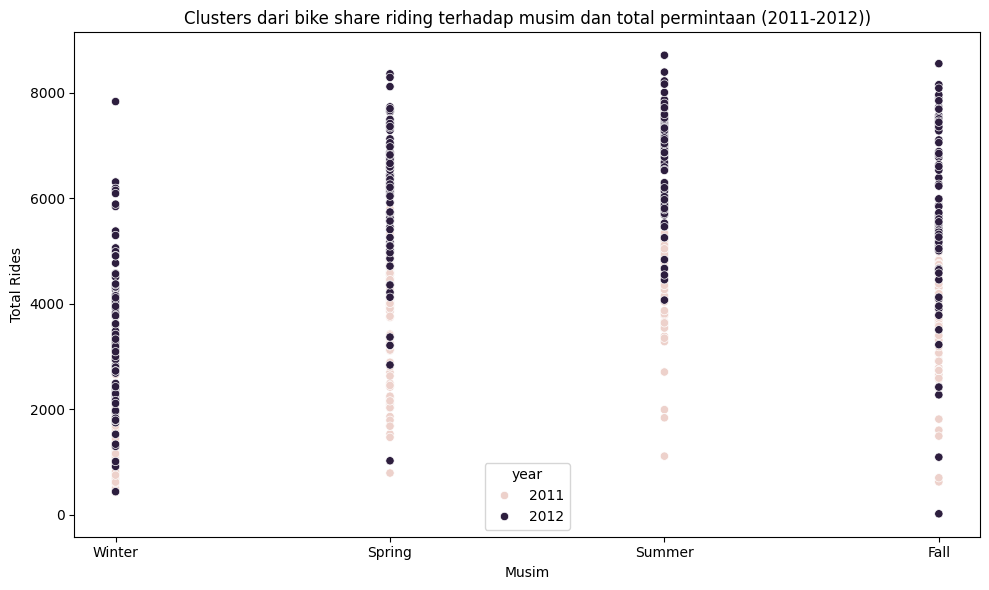

In [24]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='season', y='total_count', data=day_df, hue='year')

plt.xlabel("Musim")
plt.ylabel("Total Rides")
plt.title("Clusters dari bike share riding terhadap musim dan total permintaan (2011-2012))")

# Show the plot
plt.tight_layout()
plt.show()

* terlihat bahwa hubungan musim dengan total permintaan, dimana pada saat musim winter adalah jumlah permintaan paling rendah
* total permintaan tertinggi terdapat pada musim summer

## Conclusion

- Conclution pertanyaan 1

  Permintaan terendah terjadi pada bulan Januari secara berturut - turut dari tahun 2011 - 2012
  
- Conclution pertanyaan 2

  Permintaan terendah terjadi pada saat musim winter saecara berturut - turut dari tahun 2011 - 2012

- Conclusion pertanyaan 3

  total permintaan sangat bergantung pada musim, terlihat di musim winter permintaan paling rendah dibandingan dengan musim spring, summer, dan fall